In [1069]:
import numpy as np
import matplotlib.pyplot as plt


In [1070]:
import seaborn as sns

In [1071]:
D = 2000

In [1072]:
# create an embedding
A = np.random.randn(D).astype(np.float32)
B = np.random.randn(D).astype(np.float32)
C = np.random.randn(D).astype(np.float32)

In [1073]:
S = np.array([A, B, A, C], dtype=np.float32)
S.shape

(4, 2000)

In [1074]:
# creat 4 positionnal embeddings
P = np.random.randn(4, D).astype(np.float32)
P

array([[ 0.11170782,  0.47093746, -0.18748295, ...,  0.5092787 ,
        -1.5124216 , -1.0888779 ],
       [-2.198302  , -1.6899872 ,  0.54204565, ...,  1.4048678 ,
        -1.7648374 ,  0.98693484],
       [ 3.0224566 , -0.1343424 ,  0.86910313, ..., -1.4565439 ,
        -0.26455966,  0.6554414 ],
       [ 1.5147711 , -0.6386862 , -0.5649487 , ...,  1.1235123 ,
         1.8084735 , -0.26895404]], dtype=float32)

In [1075]:
(P[0].T).shape

(2000,)

In [1076]:
X =  P +S

In [1077]:
QK = (P[1].reshape(D, 1) @ P[0].reshape(1, D)) + (P[2].reshape(D, 1) @ P[1].reshape(1, D)) + (P[3].reshape(D, 1) @ P[2].reshape(1, D))
QK.shape

(2000, 2000)

In [1078]:
print(X.shape)
print(QK.shape)

(4, 2000)
(2000, 2000)


In [1079]:
# get attention matrix
Att = X @ QK @ (X.T)
Att.shape

(4, 4)

In [1080]:
def softmax(x, axis=None):
    x_max = np.max(x, axis=axis, keepdims=True)
    e_x = np.exp(x - x_max)
    return e_x / np.sum(e_x, axis=axis, keepdims=True)


In [1081]:
Att

array([[  63191.574 ,  155142.28  ,   64871.48  ,    4997.1143],
       [4304415.5   ,  120376.91  ,  140394.55  ,  151909.47  ],
       [ 104197.87  , 4351602.    ,  -70182.414 ,   67960.29  ],
       [ 213428.16  ,    6884.8438, 4147294.8   ,   39182.758 ]],
      dtype=float32)

In [1082]:
Att = softmax(Att, axis=1)

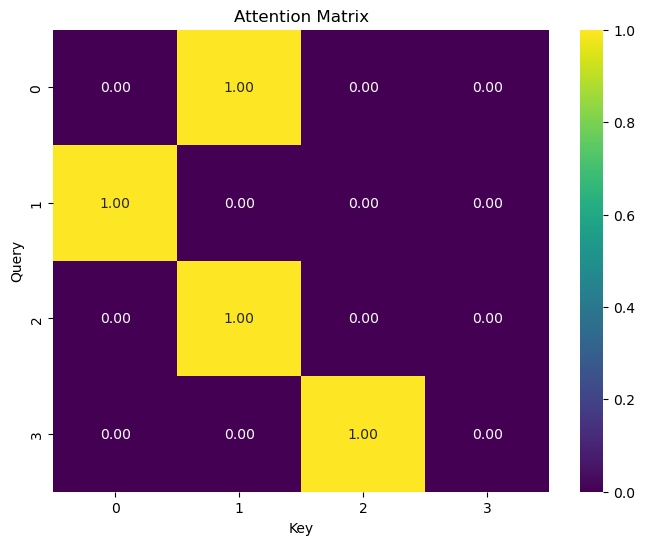

In [1083]:
# plot the attention matrix
plt.figure(figsize=(8, 6))
sns.heatmap(Att, annot=True, fmt=".2f", cmap="viridis")
plt.title("Attention Matrix")
plt.xlabel("Key")
plt.ylabel("Query")
plt.show()


In [1084]:
V = np.random.randn(D, D).astype(np.float32)
V.shape

(2000, 2000)

In [1085]:
Att@X

array([[-3.2296486 , -1.0795565 , -1.2063191 , ...,  0.67948437,
        -1.3519437 ,  0.79315084],
       [ 0.6692021 ,  1.1709601 , -1.0641487 , ...,  1.7440131 ,
        -0.6363341 , -2.7515614 ],
       [-3.2296486 , -1.0795565 , -1.2063191 , ...,  0.67948437,
        -1.3519437 ,  0.79315084],
       [ 3.5799508 ,  0.56568015, -0.00756258, ..., -0.22180963,
         0.6115278 , -1.0072421 ]], dtype=float32)

In [1086]:
Z = (Att @ X @ V)/np.linalg.norm(Att @ X @ V)+X/np.linalg.norm(X)
Z.shape

(4, 2000)

In [1087]:
np.linalg.norm(X)

127.477516

In [1088]:
# norm :
np.linalg.norm(Att @ X @ V)

5634.8887

In [1089]:
P[1].reshape(1,D) @ Z.T

array([[-0.17039926, 16.562098  , -0.20903671, -0.12655942]],
      dtype=float32)

In [1090]:
QK2 =(V.T) @ (A.reshape(D,1)) @ (P[1].reshape(1, D))

In [1091]:
Att2 = Z @ QK2 @ (Z.T)

In [1092]:
Att2 = softmax(Att2, axis=1)

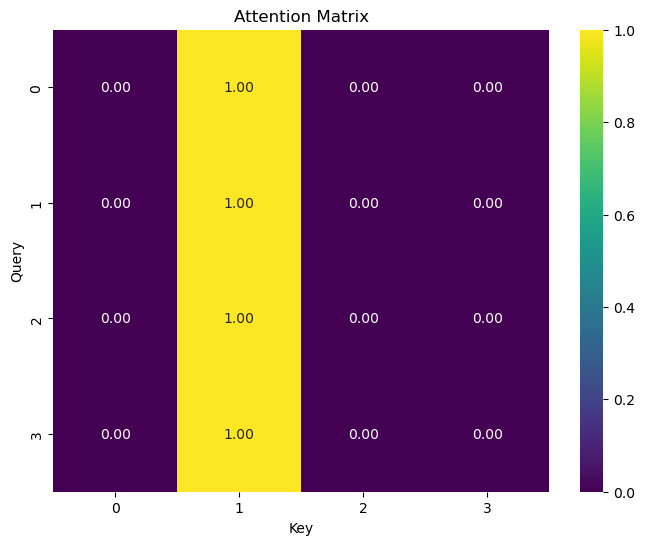

In [1093]:
# plot the attention matrix
plt.figure(figsize=(8, 6))
sns.heatmap(Att2, annot=True, fmt=".2f", cmap="viridis")
plt.title("Attention Matrix")
plt.xlabel("Key")
plt.ylabel("Query")
plt.show()
